In [2]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# 0. Preprocess

## 0.1. Load Cricut image dataset from big json file

In [3]:
from api.dataset import load_large_json

input_file_path = 'filterd_img_list_0613.json'
data = load_large_json(input_file_path)

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0.2. Filter items for different types and styles

In [4]:
from api.dataset import ItemProcessor

# Single
necessary_keywords = ['Single', 'Cut Only', 'Simple Image']  
processor = ItemProcessor(necessary_keywords)
single_items = processor.process_items(data)

# Multi
necessary_keywords = ['Multi', 'Cut Only', 'Simple Image']  
processor = ItemProcessor(necessary_keywords)
multi_items = processor.process_items(data)

# Sticker
necessary_keywords = ['Sticker Paper'] 
processor = ItemProcessor(necessary_keywords)
sticker_items = processor.process_items(data)

# Draw
necessary_keywords = ['Draw Only'] 
processor = ItemProcessor(necessary_keywords)
draw_items = processor.process_items(data)

# Silhouette
silhouette_items = single_items

# Simple
necessary_keywords = ['Simple Image'] 
processor = ItemProcessor(necessary_keywords)
simple_items = processor.process_items(data)

# Cartoon
necessary_keywords = ['Disney']
processor = ItemProcessor(necessary_keywords)
disney_items = processor.process_items(data)

# 1. Make good prompts

## Count the number of nouns, adjectives and adverbs for "name" key and calculate the sum of them. Soft dict list in descending order by the sum. Implement this by multiprocessing

In [5]:
from api.dataset import NounAdjectiveAdverbCounter

counter = NounAdjectiveAdverbCounter()

# Single
single_items = counter.compute_sum_and_sort_by_sum(single_items)
print("Single: ", len(single_items))

# Multi
multi_items = counter.compute_sum_and_sort_by_sum(multi_items)
print("Multi: ", len(multi_items))

# Sticker
sticker_items = counter.compute_sum_and_sort_by_sum(sticker_items)
print("Sticker: ", len(sticker_items))

# Draw
draw_items = counter.compute_sum_and_sort_by_sum(draw_items)
print("Draw: ", len(draw_items))

# Silhouette
silhouette_items = single_items
print("Silhouette: ", len(silhouette_items))

# Simple
simple_items = counter.compute_sum_and_sort_by_sum(simple_items)
print("Simple: ", len(simple_items))

# Cartoon
disney_items = counter.compute_sum_and_sort_by_sum(disney_items)
print("Cartoon: ", len(disney_items))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Single:  35994
Multi:  28165
Sticker:  64
Draw:  4125
Silhouette:  35994
Simple:  68525
Cartoon:  60


['Duck Silhouette | Duck Flying | Pigeon Svg | Duck Hunting | Hunter Dad | Camp Scene | Outdoor Lake']
['Cute Cat With D20 Dice Kawaii D&D Role Play Game']
['Easter Bunny Hand Drawn Rabbit Cute Face']
['Bloody Handprints, True Crime 24oz Reusable Drink Wrap']
['Letter Z With Football Leopard Print Heart ']
['Letter Y With Football Leopard Print Heart ']
['Letter X With Football Leopard Print Heart ']
['Letter W With Football Leopard Print Heart ']
['Letter V With Football Leopard Print Heart ']
['Letter U With Football Leopard Print Heart ']
['Letter T With Football Leopard Print Heart ']
['Letter R With Football Leopard Print Heart ']
['Letter Q With Football Leopard Print Heart ']
['Letter P With Football Leopard Print Heart ']
['Letter O With Football Leopard Print Heart ']
['Letter N With Football Leopard Print Heart ']
['Letter M With Football Leopard Print Heart ']
['Letter L With Football Leopard Print Heart ']
['Letter K With Football Leopard Print Heart ']
['Letter J With Foot

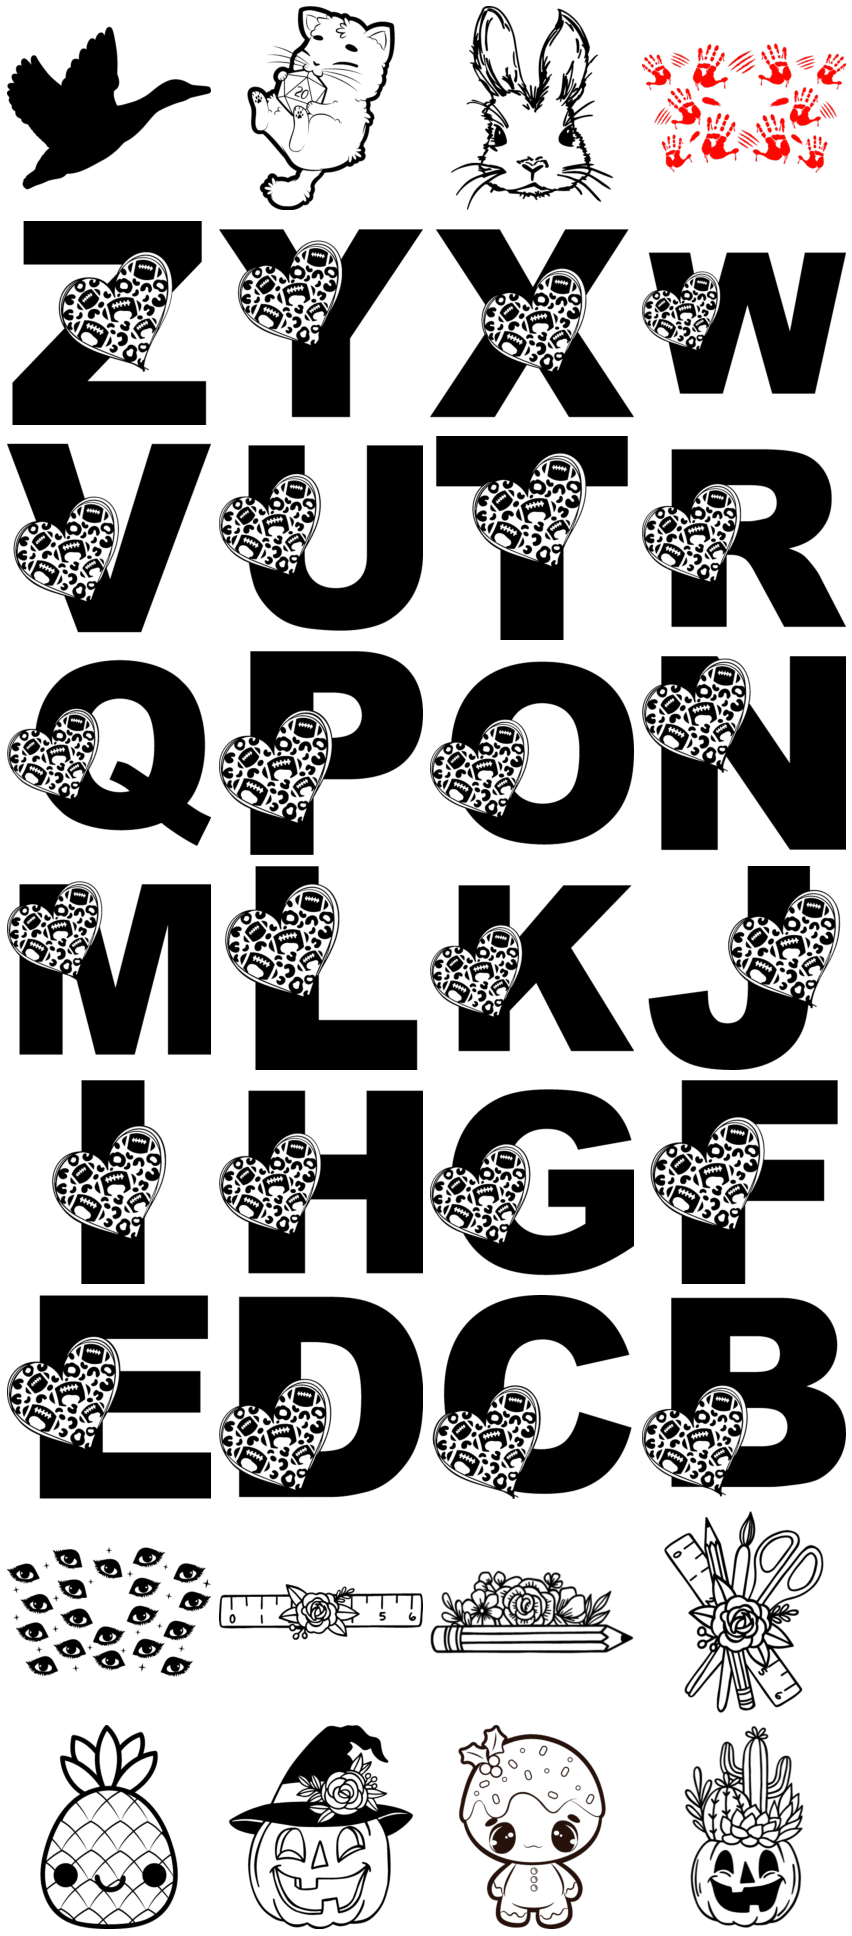

['Wine Glass Clip Art, Different Shapes Of Wine Glasses, Wine Glass Logos']
['Cute Cat With D20 Dice Kawaii D&D Role Play Game']
['DC League of Super-Pets� Vet Check-Up Kit Syringe Empty']
['Pink Retro Groovy Flower Power Cup Wrap']
['Bunny With Glasses, Polka Dot Bow Headband and Bubble Gum']
['School Supplies Monogram Frame Pencil Paintbrush Ruler Scissors']
['Easter Bunny Glasses Hand Drawn Rabbit Cute Face']
['Hamsa Moon Evil Eye, Boho Spiritual Symbol']
['Y2k Retro Hearts, Valentines Day 24oz Tumber Wrap']
['Heart Drip Sprinkles, valentines Day 24oz Tumbler Wrap']
['Thunder Bolt Star Heart, Retro Celestial 24oz Tumbler Wrap']
['Fancy Layered Framed Flower Scallop Circle Label Shape']
['DC League of Super-Pets BATMAN� Logo Cupcake Topper']
['DC League of Super-Pets� Green Lantern� Logo Cupcake Topper']
['DC League of Super-Pets� Solar Paw Punch Banner']
['DC League of Super-Pets� Lex Luthor� and Lulu Banner']
['DC League of Super-Pets� Green Lantern� and Chip Banner']
['DC League o

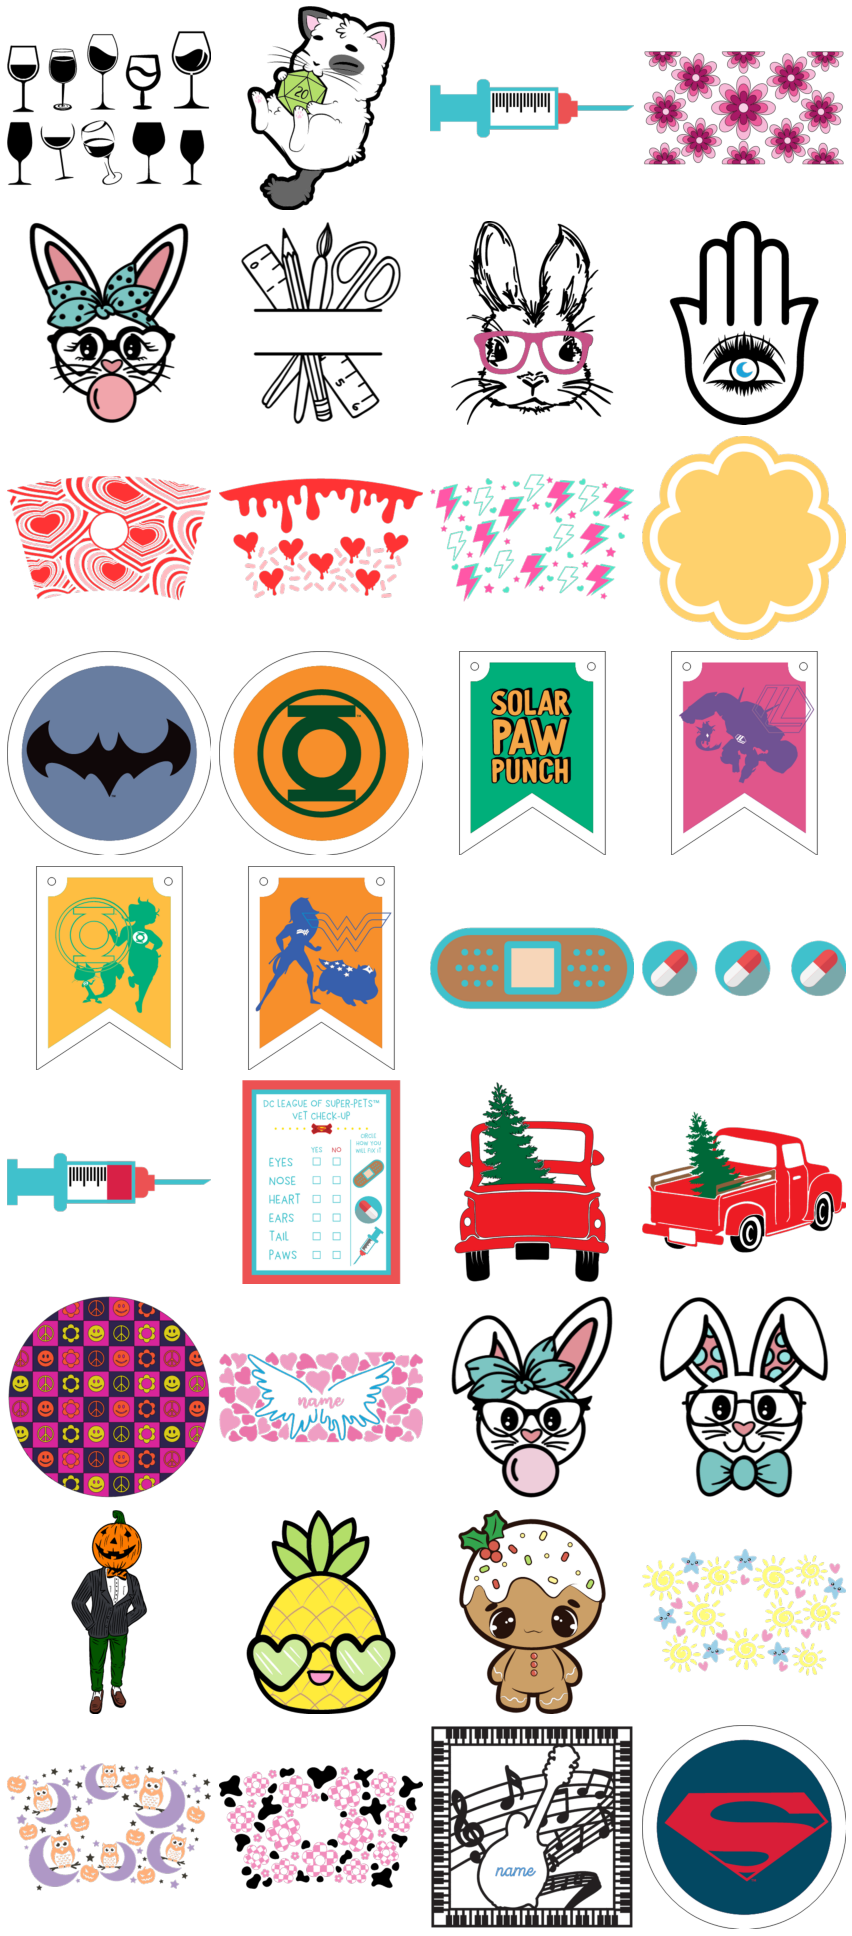

['DC League of Super-Pets Stickers edit']
['Easter Egg And Flower']
['Easter Bunny With Egg']
['Easter Egg Basket']
['Ice Cream Cone']
['Razor Crest Knob']
['Easter Eggs']
['Easter Chicken']
['Paint Splatter']
['Paint Splatter']
['Paint Splatter']
['Paint Splatter']
['Paint Splatter']
['Bear Silhouette']
['Candy Cane']
['Islamic Window']
['Islamic Window']
['Palm Leaf']
['Green Lantern']
['Iron Rodent']
['Superman� Disguise']
['Wonder Woman�']
['Wonder Woman�']
['Mandala Leaf']
['Mandala Leaf']
['Mandala Leaf ']
['Christmas Ornament']
['Name tag']
['Name tag']
['Name tag']
['Name tag']
['Name tag']
['Name tag']
['Name tag']
['Grogu in Pram']
['Grogu Reaching Out']


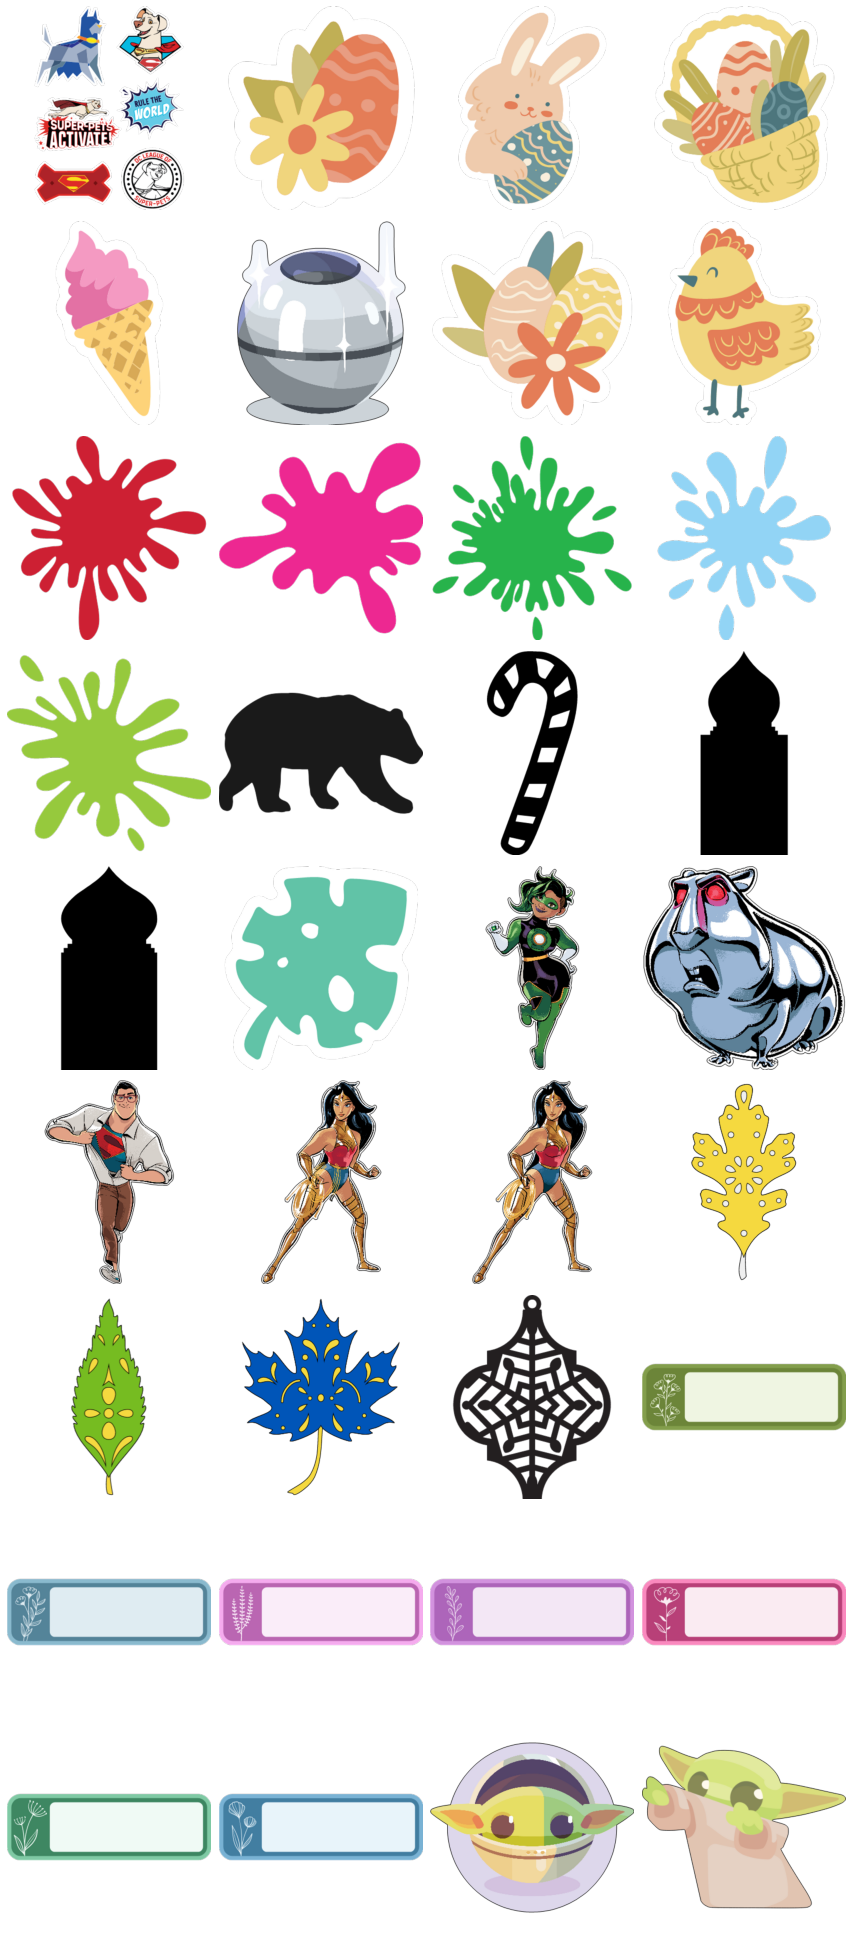

In [6]:
from api.display import show_images_from_list

# Single
names = [item["name"] for item in single_items]
for name in names[0:36]:
    print(name)
show_images_from_list(single_items[0:36])

# Multi
names = [item["name"] for item in multi_items]
for name in names[0:36]:
    print(name)
show_images_from_list(multi_items[0:36])

# Sticker
names = [item["name"] for item in sticker_items]
for name in names[0:36]:
    print(name)
show_images_from_list(sticker_items[0:36])

# 2. Choose best images from current large training cricut image dataset.

In [7]:
from api.dataset import DuplicateRemover

# Single
dr = DuplicateRemover(single_items)
min_len = 5
single_items = dr.remove_duplicates(min_len)
print("Single: ", len(single_items))

Single:  404


In [8]:
# Multi
dr = DuplicateRemover(multi_items)
min_len = 5
multi_items = dr.remove_duplicates(min_len)
print("Multi: ", len(multi_items))

Multi:  445


In [9]:
# Sticker
dr = DuplicateRemover(sticker_items)
min_len = 0
sticker_items = dr.remove_duplicates(min_len)
print("Sticker: ", len(sticker_items))

Sticker:  42


In [10]:
# Draw
dr = DuplicateRemover(draw_items)
min_len = 5
draw_items = dr.remove_duplicates(min_len)
print("Draw: ", len(draw_items))

Draw:  148


In [11]:
# Silhouette
silhouette_items = single_items
print("Silhouette: ", len(silhouette_items))

Silhouette:  404


In [12]:
# Simple
dr = DuplicateRemover(simple_items)
min_len = 5
simple_items = dr.remove_duplicates(min_len)
print("Simple: ", len(simple_items))

Simple:  783


In [13]:
# Cartoon
dr = DuplicateRemover(disney_items)
min_len = 0
disney_items = dr.remove_duplicates(min_len)
print("Cartoon: ", len(disney_items))

Cartoon:  27


['Duck Silhouette | Duck Flying | Pigeon Svg | Duck Hunting | Hunter Dad | Camp Scene | Outdoor Lake']
['Military Kneeling At Cross To Honor the Brave On Memorial Day']
['Cute Cat With D20 Dice Kawaii D&D Role Play Game']
['Bloody Handprints, True Crime 24oz Reusable Drink Wrap']
['Cute Gingerbread Man for a Kawaii Christmas Cookies']
['Split Diagonal Border 15oz/425ml Beveled Ceramic Mug Designs']
['The End is Near Buy This Man Beer']
['New Years Gnome With Party Hat & Horn']
['Duck In a Swimming Mask And Rubber Ring']
['Land Of The Free Because Of The Brave']
['If Not Me Who  If Not Now When ']
['Easter Bunny Hand Drawn Rabbit Cute Face']
['Letter Z With Football Leopard Print Heart ']
['Boho Celestial Eyes 24oz Tumbler Cup Wrap']
['Cute Pineapple Cartoon for Kawaii Summer Emoji']
['Eye of Horus Ankh, Ancient Spiritual Symbol']
['Bunny Ear Easter Basket Tag Name Bar']
['Floral Hair Dryer Scissors Brush and Comb']
['Bunny With Glasses, Bow Tie & Mustache']
['Stack of Books Tea Cup and

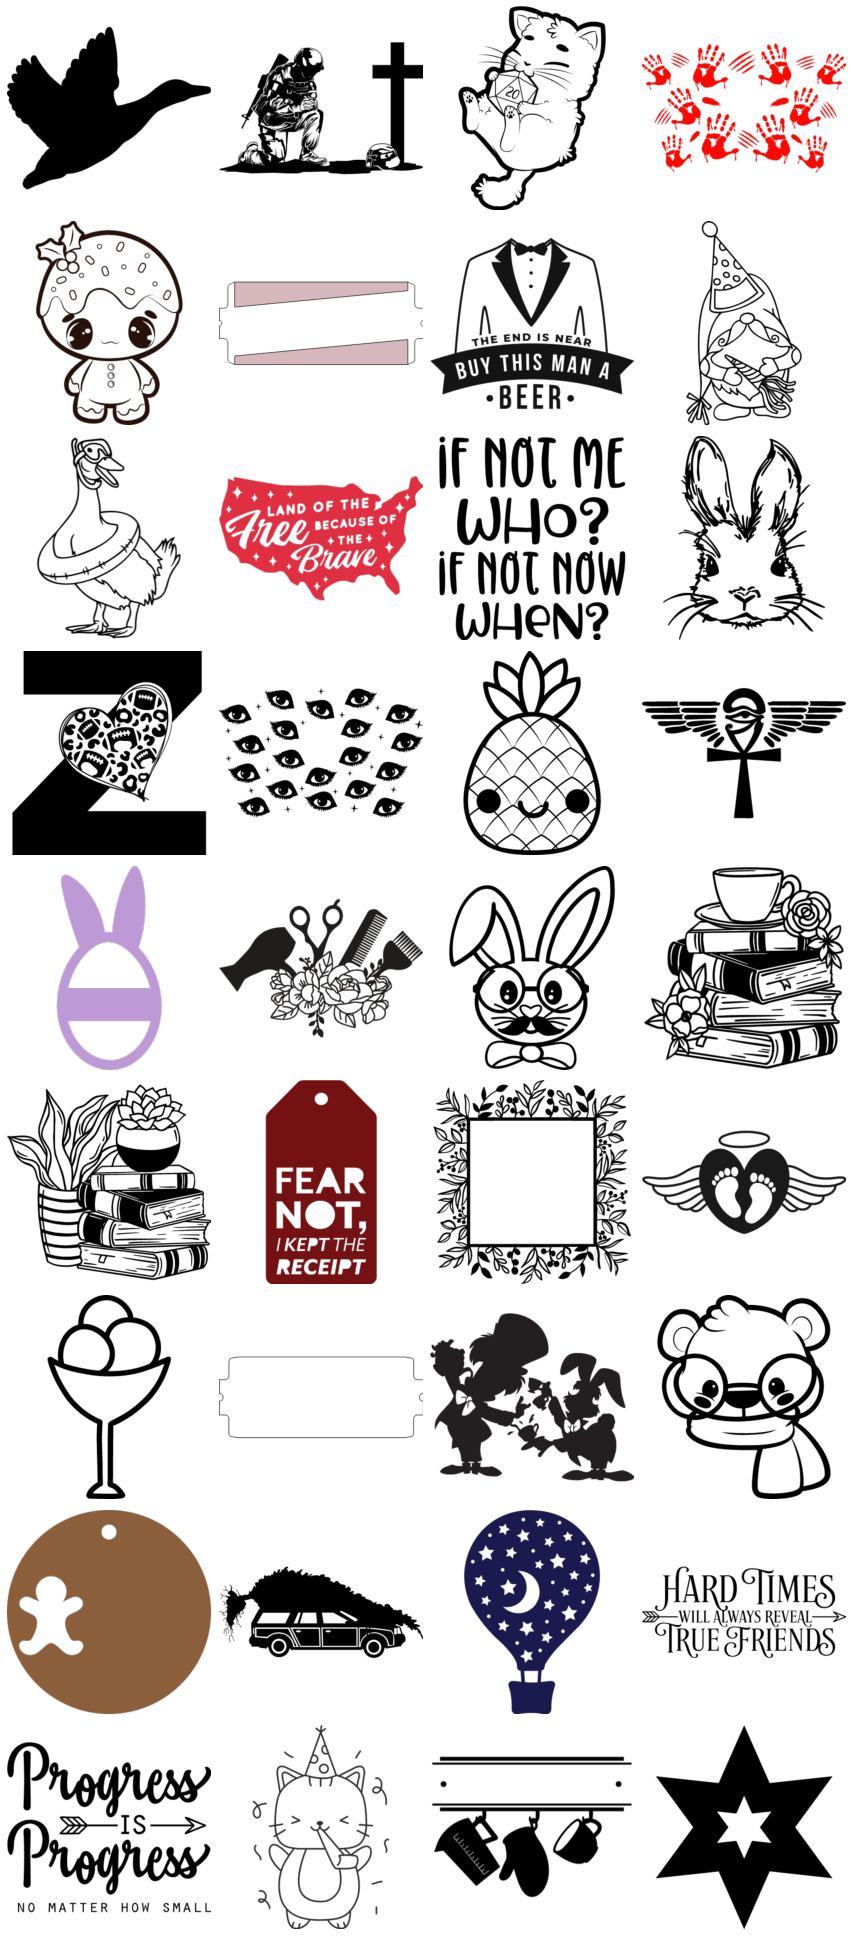

['Wine Glass Clip Art, Different Shapes Of Wine Glasses, Wine Glass Logos']
['Travel Around the World - Plane World Map With A Heart']
['all because two people fell in love last name with name']
['Cute Cat With D20 Dice Kawaii D&D Role Play Game']
['Bunny With Glasses, Polka Dot Bow Headband and Bubble Gum']
['Hand Drawn Back Of Vintage Pick Up Truck W Tree']
['DC League of Super-Pets� Vet Check-Up Kit Syringe Empty']
['Thunder Bolt Star Heart, Retro Celestial 24oz Tumbler Wrap']
['Angel Wings Name Hearts, 16oz Can Glass Cup Wrap']
['Crossing Arrows With Paw Print, Mountains, Coffee, and Forest']
['A Monogram Glass Can Wrap With Rainbows And Flowers']
['Buy Me a Brew Before I Say I Do']
['School Supplies Monogram Frame Pencil Paintbrush Ruler Scissors']
['Easter Bunny Glasses Hand Drawn Rabbit Cute Face']
['Y2k Retro Hearts, Valentines Day 24oz Tumber Wrap']
['Fancy Layered Framed Flower Scallop Circle Label Shape']
['DC League of Super-Pets BATMAN� Logo Cupcake Topper']
['DC League of

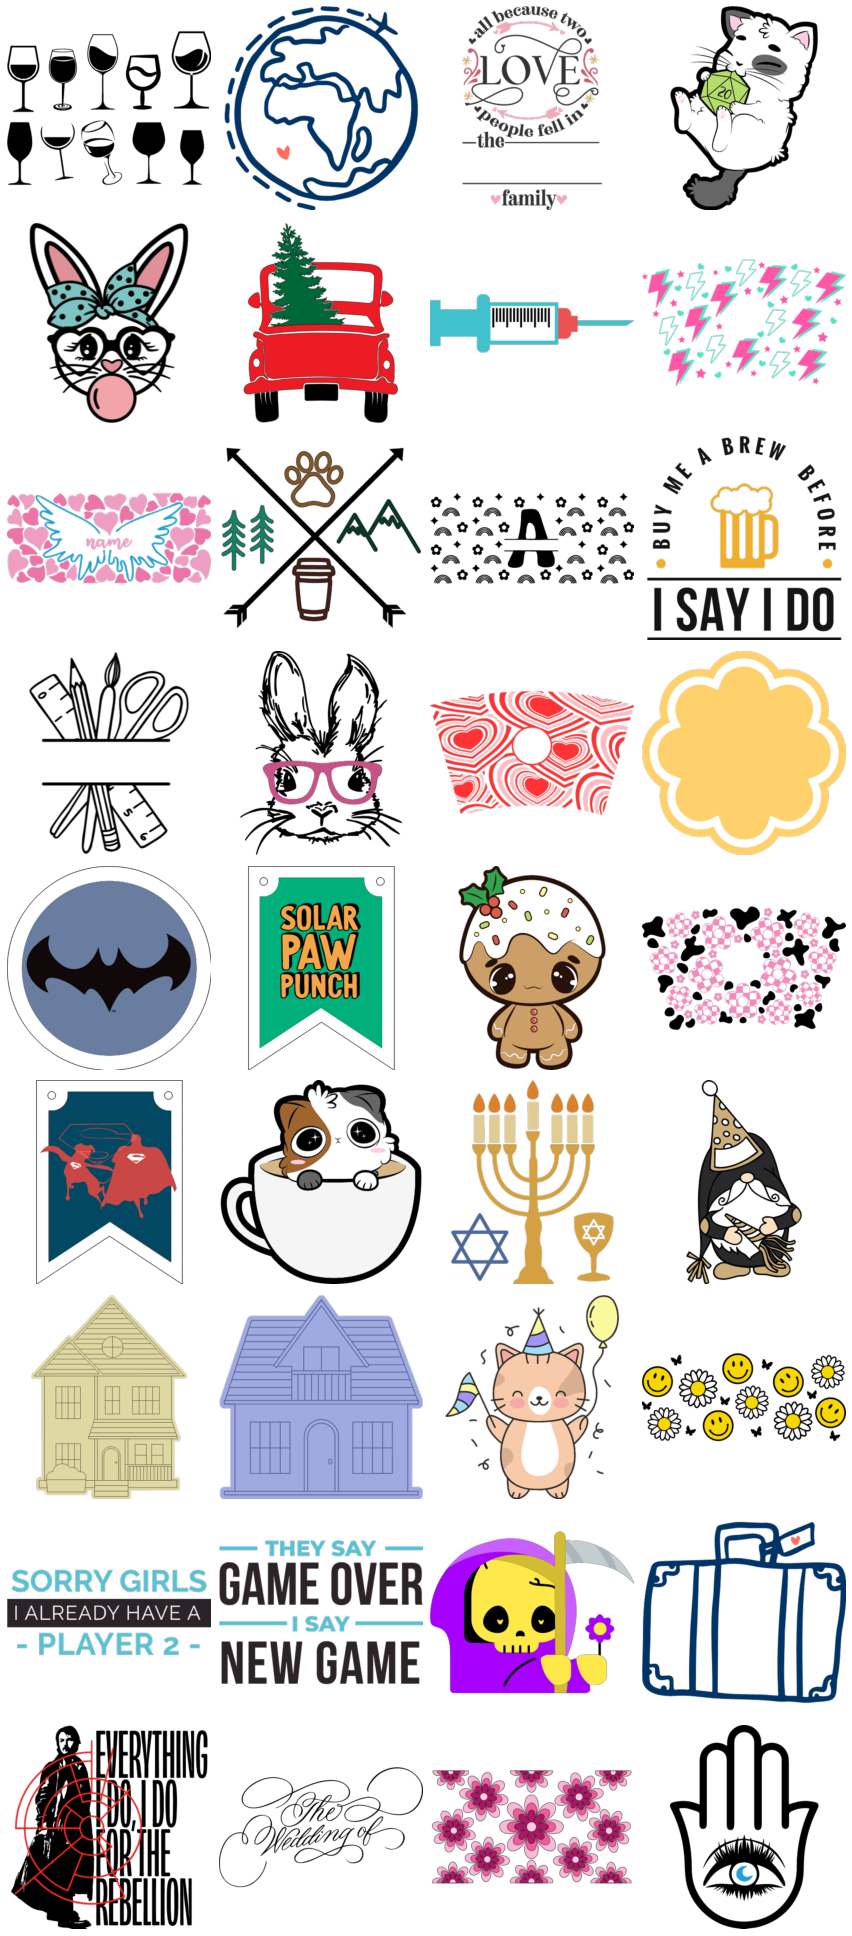

['DC League of Super-Pets Stickers edit']
['Easter Egg And Flower']
['Easter Bunny With Egg']
['Grogu Using The Force']
['Easter Egg Basket']
['Ice Cream Cone']
['Razor Crest Knob']
['Grogu in Pram']
['Grogu Reaching Out']
['Mando and Grogu']
['Easter Chicken']
['Paint Splatter']
['Bear Silhouette']
['Candy Cane']
['Islamic Window']
['Palm Leaf']
['Green Lantern']
['Iron Rodent']
['Superman� Disguise']
['Wonder Woman�']
['Mandala Leaf']
['Christmas Ornament']
['Name tag']
['Sorgan Frog']
['Butterfly Mandala']
['Circle Mandala']
['Heart Mandala']
['Smiling Flower']
['Christmas Tree']
['Laughing Pinapple']
['Krypto Flying']
['Grogu Staring']
['Carrot']
['Flower']
['Mustache']
['Heart']


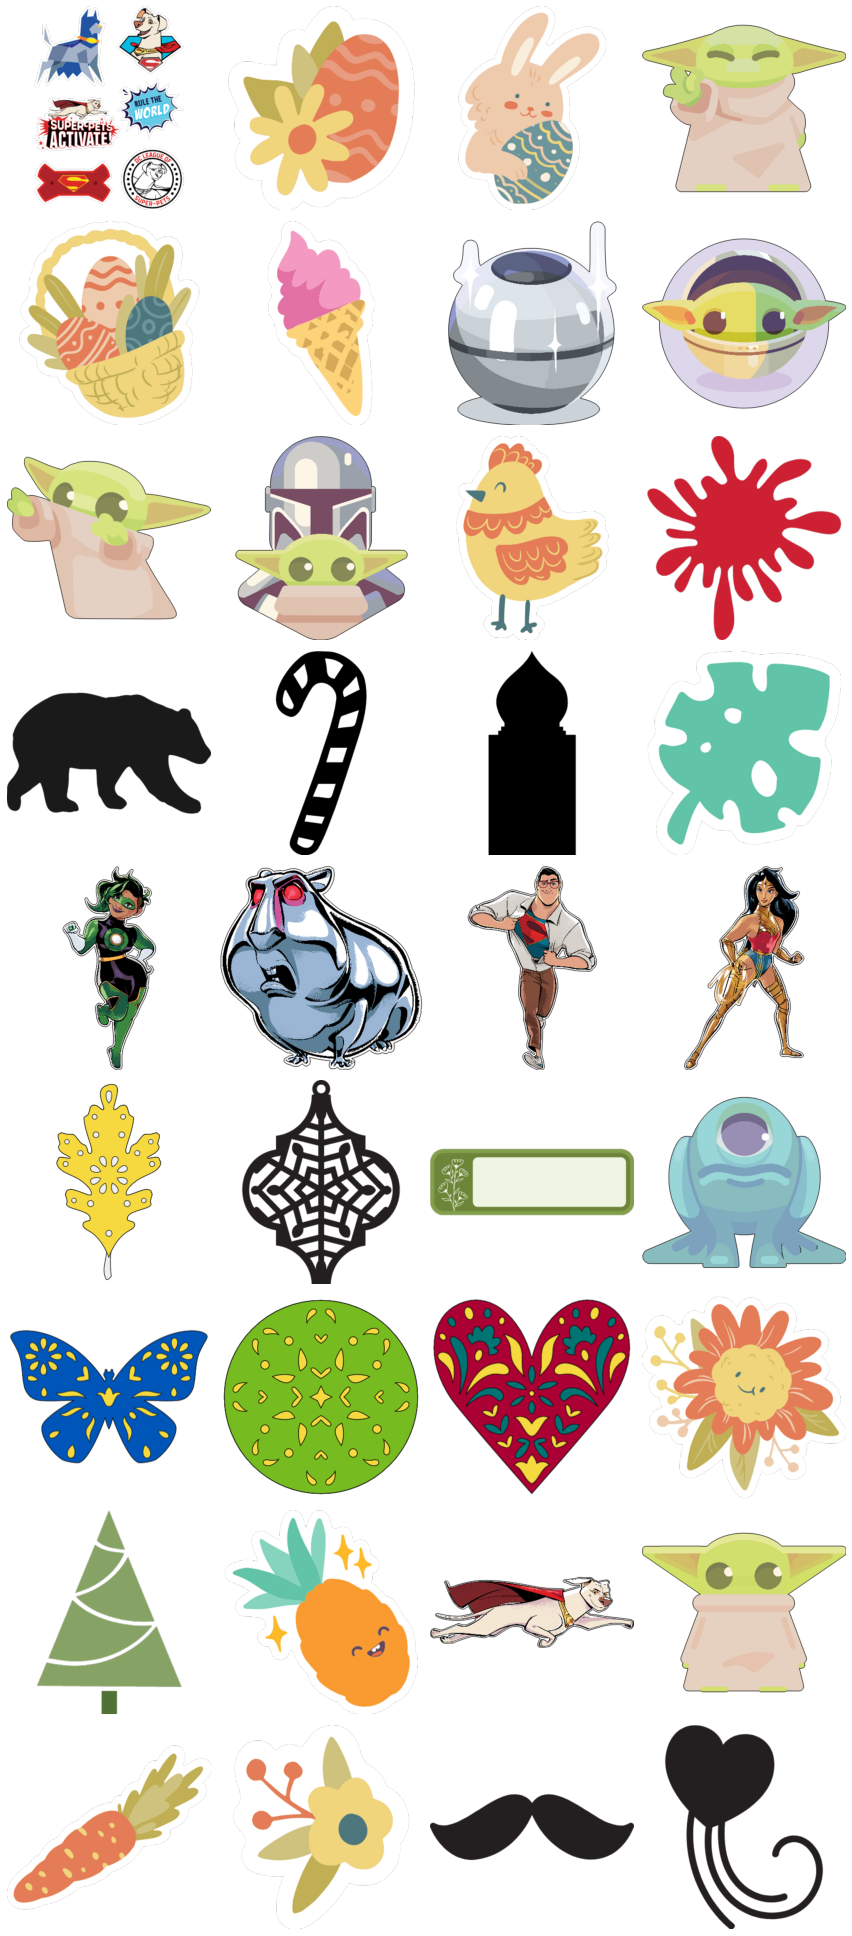

In [14]:
from api.display import show_images_from_list

# Single
names = [item["name"] for item in single_items]
for name in names[0:36]:
    print(name)
show_images_from_list(single_items[0:36])

# Multi
names = [item["name"] for item in multi_items]
for name in names[0:36]:
    print(name)
show_images_from_list(multi_items[0:36])

# Sticker
names = [item["name"] for item in sticker_items]
for name in names[0:36]:
    print(name)
show_images_from_list(sticker_items[0:36])

# 3. Upload new dataset

In [15]:
from api.dataset import ImageUploader

In [18]:
# Single
bucket_name = 'sagemaker-image-generation-data'
subfolder = 'lora_datasets/train_data_from_cricut/cricut_filtered_0803/single_style'
image_type = "single style"
size = (512, 512)

# Call the upload_images_to_s3 function
print(len(single_items))
uploader = ImageUploader(bucket_name, subfolder, image_type, size)
uploader.upload_images_to_s3(single_items)

404


In [19]:
# Multi
bucket_name = 'sagemaker-image-generation-data'
subfolder = 'lora_datasets/train_data_from_cricut/cricut_filtered_0803/multi_style'
image_type = "multi style"
size = (512, 512)

# Call the upload_images_to_s3 function
print(len(multi_items))
uploader = ImageUploader(bucket_name, subfolder, image_type, size)
uploader.upload_images_to_s3(multi_items)

445


In [20]:
# Sticker
bucket_name = 'sagemaker-image-generation-data'
subfolder = 'lora_datasets/train_data_from_cricut/cricut_filtered_0803/sticker_style'
image_type = "sticker style"
size = (512, 512)

# Call the upload_images_to_s3 function
print(len(sticker_items))
uploader = ImageUploader(bucket_name, subfolder, image_type, size)
uploader.upload_images_to_s3(sticker_items)

42


In [21]:
# Draw
bucket_name = 'sagemaker-image-generation-data'
subfolder = 'lora_datasets/train_data_from_cricut/cricut_filtered_0803/draw_style'
image_type = "draw style"
size = (512, 512)

# Call the upload_images_to_s3 function
print(len(draw_items))
uploader = ImageUploader(bucket_name, subfolder, image_type, size)
uploader.upload_images_to_s3(draw_items)

148


In [22]:
# Simple
bucket_name = 'sagemaker-image-generation-data'
subfolder = 'lora_datasets/train_data_from_cricut/cricut_filtered_0803/simple_style'
image_type = "simple style"
size = (512, 512)

# Call the upload_images_to_s3 function
print(len(simple_items))
uploader = ImageUploader(bucket_name, subfolder, image_type, size)
uploader.upload_images_to_s3(simple_items)

783


In [23]:
# Cartoon
bucket_name = 'sagemaker-image-generation-data'
subfolder = 'lora_datasets/train_data_from_cricut/cricut_filtered_0803/cartoon_style'
image_type = "cartoon style"
size = (512, 512)

# Call the upload_images_to_s3 function
print(len(disney_items))
uploader = ImageUploader(bucket_name, subfolder, image_type, size)
uploader.upload_images_to_s3(disney_items)

27


In [29]:
# Silhouette
import importlib
import api.dataset

importlib.reload(api.dataset)
from api.dataset import BWImageUploader

bucket_name = 'sagemaker-image-generation-data'
subfolder = 'lora_datasets/train_data_from_cricut/cricut_filtered_0803/silhouette_style'
image_type = "silhouette style"
size = (512, 512)

# Call the upload_images_to_s3 function
print(len(silhouette_items))
uploader = BWImageUploader(silhouette_items, bucket_name, subfolder, image_type, size)
uploader.upload_images_bw_to_s3()

404


# 4. Train LoRA models for all styles by using Pipeline

# 5. Download trained models and convert them to st files

## 5.1. Download trained models

In [52]:
import api.cloud_util
importlib.reload(api.cloud_util)

from api.cloud_util import download_and_extract_tar_gz_file

bucket_name = 'sagemaker-image-generation-data'

In [53]:
# Single
sub_folder = "lora_outputs/pipelines-qur1zdb56iug-Lora-TrainModel-hOARkxQuC9/output/"
object_key = sub_folder + 'model.tar.gz'  
single_destination_folder = 'models/cricut_filtered_0804/lora_model_single'  
download_and_extract_tar_gz_file(bucket_name, object_key, single_destination_folder)

model.tar.gz


In [54]:
# Multi
sub_folder = "lora_outputs/pipelines-hy8zyl4a2epc-Lora-TrainModel-DHUcqWbIXg/output/"
object_key = sub_folder + 'model.tar.gz'  
multi_destination_folder = 'models/cricut_filtered_0804/lora_model_multi'  
download_and_extract_tar_gz_file(bucket_name, object_key, multi_destination_folder)

model.tar.gz


In [55]:
# Sticker
sub_folder = "lora_outputs/pipelines-txrzhe5248ue-Lora-TrainModel-oo7QSikPAL/output/"
object_key = sub_folder + 'model.tar.gz'  
sticker_destination_folder = 'models/cricut_filtered_0804/lora_model_sticker'  
download_and_extract_tar_gz_file(bucket_name, object_key, sticker_destination_folder)

model.tar.gz


In [56]:
# Draw
sub_folder = "lora_outputs/pipelines-vf6gflo0i477-Lora-TrainModel-A6VjyG2My6/output/"
object_key = sub_folder + 'model.tar.gz'  
draw_destination_folder = 'models/cricut_filtered_0804/lora_model_draw'  
download_and_extract_tar_gz_file(bucket_name, object_key, draw_destination_folder)

model.tar.gz


In [57]:
# Simple
sub_folder = "lora_outputs/pipelines-9wk8lo9f9jqt-Lora-TrainModel-FFPAwkZxrh/output/"
object_key = sub_folder + 'model.tar.gz'  
simple_destination_folder = 'models/cricut_filtered_0804/lora_model_simple'  
download_and_extract_tar_gz_file(bucket_name, object_key, simple_destination_folder)

model.tar.gz


In [58]:
# Cartoon
sub_folder = "lora_outputs/pipelines-8e024cr4dwe1-Lora-TrainModel-xDGbV6khE7/output/"
object_key = sub_folder + 'model.tar.gz'  
cartoon_destination_folder = 'models/cricut_filtered_0804/lora_model_cartoon'  
download_and_extract_tar_gz_file(bucket_name, object_key, cartoon_destination_folder)

model.tar.gz


In [61]:
# Silhouette
sub_folder = "lora_outputs/pipelines-uce2gxjpas97-Lora-TrainModel-kS1W3K4nlo/output/"
object_key = sub_folder + 'model.tar.gz'  
silhouette_destination_folder = 'models/cricut_filtered_0804/lora_model_silhouette'  
download_and_extract_tar_gz_file(bucket_name, object_key, silhouette_destination_folder)

model.tar.gz


## 5.2. Convert bin to st files

In [64]:
import api.converter
importlib.reload(api.converter)

from api.converter import LoRAConverter

model_id = "runwayml/stable-diffusion-v1-5"
converter = LoRAConverter(model_id)

Loading pipeline components...:  29%|██▊       | 2/7 [00:02<00:05,  1.12s/it]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|██████████| 7/7 [00:36<00:00,  5.20s/it]


In [65]:
# Multi
bin_path = multi_destination_folder + '/pytorch_lora_weights_045000.bin'
out_name = "/multi.st"
st_path = multi_destination_folder + out_name
converter.bin_to_safetensors(bin_path, st_path)

In [68]:
# Single
bin_path = single_destination_folder + '/pytorch_lora_weights_041000.bin'
out_name = "/single.st"
st_path = single_destination_folder + out_name
converter.bin_to_safetensors(bin_path, st_path)

In [69]:
# Sticker
bin_path = sticker_destination_folder + '/pytorch_lora_weights_005000.bin'
out_name = "/sticker.st"
st_path = sticker_destination_folder + out_name
converter.bin_to_safetensors(bin_path, st_path)

In [70]:
# Draw
bin_path = draw_destination_folder + '/pytorch_lora_weights_015000.bin'
out_name = "/draw.st"
st_path = draw_destination_folder + out_name
converter.bin_to_safetensors(bin_path, st_path)

In [71]:
# Cartoon
bin_path = cartoon_destination_folder + '/pytorch_lora_weights_005000.bin'
out_name = "/cartoon.st"
st_path = cartoon_destination_folder + out_name
converter.bin_to_safetensors(bin_path, st_path)

In [72]:
# Silhouette
bin_path = silhouette_destination_folder + '/pytorch_lora_weights_041000.bin'
out_name = "/silhouette.st"
st_path = silhouette_destination_folder + out_name
converter.bin_to_safetensors(bin_path, st_path)

In [73]:
# Simple
bin_path = simple_destination_folder + '/pytorch_lora_weights_080000.bin'
out_name = "/simple.st"
st_path = simple_destination_folder + out_name
converter.bin_to_safetensors(bin_path, st_path)

## 5.3. Upload safe tensors to s3 bucket

In [74]:
import api.cloud_util
importlib.reload(api.cloud_util)

from api.cloud_util import upload_file_to_s3

In [75]:
local_file_path_multi = "models/cricut_filtered_0804/lora_model_multi/multi.st"
local_file_path_single = "models/cricut_filtered_0804/lora_model_single/single.st"
local_file_path_simple = "models/cricut_filtered_0804/lora_model_simple/simple.st"
local_file_path_draw = "models/cricut_filtered_0804/lora_model_draw/draw.st"
local_file_path_cartoon = "models/cricut_filtered_0804/lora_model_cartoon/cartoon.st"
local_file_path_sticker = "models/cricut_filtered_0804/lora_model_sticker/sticker.st"
local_file_path_silhouette = "models/cricut_filtered_0804/lora_model_silhouette/silhouette.st"

bucket_name = 'sagemaker-image-generation-data'
subfolder_name = "lora_outputs/safetensors/cricut_filtered_0804"

s3_destination_filename_multi = 'multi.st'
s3_destination_filename_single = 'single.st'
s3_destination_filename_simple = 'simple.st'
s3_destination_filename_draw = 'draw.st'
s3_destination_filename_sticker = 'sticker.st'
s3_destination_filename_silhouette = 'silhouette.st'
s3_destination_filename_cartoon = 'cartoon.st'

upload_file_to_s3(local_file_path_multi, bucket_name, subfolder_name, s3_destination_filename_multi)
upload_file_to_s3(local_file_path_single, bucket_name, subfolder_name, s3_destination_filename_single)
upload_file_to_s3(local_file_path_simple, bucket_name, subfolder_name, s3_destination_filename_simple)
upload_file_to_s3(local_file_path_draw, bucket_name, subfolder_name, s3_destination_filename_draw)
upload_file_to_s3(local_file_path_cartoon, bucket_name, subfolder_name, s3_destination_filename_cartoon)
upload_file_to_s3(local_file_path_sticker, bucket_name, subfolder_name, s3_destination_filename_sticker)
upload_file_to_s3(local_file_path_silhouette, bucket_name, subfolder_name, s3_destination_filename_silhouette)

True

# 6. Demonstrate results

## 6.1. Prompts

In [86]:
style_list = ['single', 'multi', 'simple', 'sticker', 'cartoon', 'draw', 'silhouette']
suffix = "style"

prompt = dict()
prompt['generic'] = ["a dog", "a ladybug", "a rubber ducky", "grandma", "mom", "dad", "a baby", "a forest", "a forest, vibrant colors", "orange"]
prompt['descriptive'] = ["a capybara made of Lego sitting in a sunny field", "a close-up of a fire spitting dragon, cinematic shot", \
                         "a propaganda poster depicting a cat dressed as French Emperor Napoleon holding a piece of cheese", \
                         "Panda mad scientist mixing sparkling chemicals", \
                         "A robot painted as graffiti on a brick wall. a sidewalk is in front of the wall, and grass is growing out of cracks in the concrete.", \
                         "A futuristic cityscape at night with neon lights and flying cars", "A serene beach with crystal clear turquoise water and palm trees", \
                         "An abstract pattern with bold and contrasting colors", "A surreal underwater scene with colorful coral reefs and exotic sea creatures", \
                         "A cozy cabin nestled in a snow-covered forest", \
                         "An artistic representation of a bustling market in a vibrant and diverse jungle village", \
                         "A dreamy celestial landscape with stars, galaxies, and a radiant moon", \
                         "A vast landscape with floating islands and waterfalls in the sky", "A cute robot artist painting on an easel", \
                         "A baby penguin wearing a blue hat, red gloves, green shirt, and yellow pants", \
                         "Cute adorable little goat, cozy interior lighting", "Monster Baba yaga house with in a forest, dark horror style, black and white"]
prompt["text"] = ["A waitress holding a menu that says \"Menu\" at the top", \
                  "A green sign that says \"Very Deep Learning\" at the edge of the Grand Canyon", \
                  "A portrait photo of a kangaroo wearing an orange hoodie and blue sunglasses standing on the grass in front of the Sydney Opera House holding a sign on the chest that says \"Stable Diffusion!\""]
prompt["difficult"] = ["An abstract representation of the concept of time", \
                       "An artistic representation of the four seasons merging together in a single image", \
                       "An abstract pattern inspired by music and sound waves"]

## 6.2. Pretrained

In [89]:
from diffusers import StableDiffusionPipeline
import torch
import os

mode = "pretrained"
out_path = "result/cricut_filtered_0804/" + mode

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
pipe = pipe.to("cuda")

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key + "/"
        if not os.path.exists(path):
            os.makedirs(path)
        
        image = pipe(p).images[0]
        image.save(path + p + ".png")

unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 18.97it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 50/50 [00:09<00:00,  5.12it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


## 6.3. Single

In [97]:
import api.inference
importlib.reload(api.inference)

from api.inference import inference

In [99]:
mode = "single style"
st_path = "models/cricut_filtered_0804/lora_model_single/single.st"
out_path = "result/cricut_filtered_0804/single"

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key
        if not os.path.exists(path):
            os.makedirs(path)        
        inference(mode, st_path, [mode + ', ' + p], path, num_steps = 20, scale = 10, size = 512)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  8.59it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline

## 6.4. Multi

In [100]:
mode = "multi style"
st_path = "models/cricut_filtered_0804/lora_model_multi/multi.st"
out_path = "result/cricut_filtered_0804/multi"

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key
        if not os.path.exists(path):
            os.makedirs(path)        
        inference(mode, st_path, [mode + ', ' + p], path, num_steps = 20, scale = 10, size = 512)

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  6.68it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  8.56it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading 

## 6.5. Sticker

In [102]:
mode = "sticker style"
st_path = "models/cricut_filtered_0804/lora_model_sticker/sticker.st"
out_path = "result/cricut_filtered_0804/sticker"

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key
        if not os.path.exists(path):
            os.makedirs(path)        
        inference(mode, st_path, [mode + ', ' + p], path, num_steps = 20, scale = 10, size = 512)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 10.94it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline

## 6.6. Draw

In [103]:
mode = "draw style"
st_path = "models/cricut_filtered_0804/lora_model_draw/draw.st"
out_path = "result/cricut_filtered_0804/draw"

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key
        if not os.path.exists(path):
            os.makedirs(path)        
        inference(mode, st_path, [mode + ', ' + p], path, num_steps = 20, scale = 10, size = 512)

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  7.64it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 10.86it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading 

## 6.7. Simple

In [104]:
mode = "simple style"
st_path = "models/cricut_filtered_0804/lora_model_simple/simple.st"
out_path = "result/cricut_filtered_0804/simple"

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key
        if not os.path.exists(path):
            os.makedirs(path)        
        inference(mode, st_path, [mode + ', ' + p], path, num_steps = 20, scale = 10, size = 512)

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  7.87it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 10.03it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading 

## 6.8. Cartoon

In [105]:
mode = "cartoon style"
st_path = "models/cricut_filtered_0804/lora_model_cartoon/cartoon.st"
out_path = "result/cricut_filtered_0804/cartoon"

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key
        if not os.path.exists(path):
            os.makedirs(path)        
        inference(mode, st_path, [mode + ', ' + p], path, num_steps = 20, scale = 10, size = 512)

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  7.85it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 10.94it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading 

## 6.9. Silhouette

In [106]:
mode = "silhouette style"
st_path = "models/cricut_filtered_0804/lora_model_silhouette/silhouette.st"
out_path = "result/cricut_filtered_0804/silhouette"

for key, value in prompt.items():
    for p in value:
        
        path = out_path + "/" + key
        if not os.path.exists(path):
            os.makedirs(path)        
        inference(mode, st_path, [mode + ', ' + p], path, num_steps = 20, scale = 10, size = 512)

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  7.72it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00, 10.97it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading 

# 7. Show together

In [107]:
mode_list = ["pretrained", "single", "multi", "sticker", "draw", "cartoon", "simple", "silhouette"]
root_path = "result/cricut_filtered_0804"

In [111]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## 7.1. Generic (does the system do something interesting with basic prompts)

In [ ]:
key = "generic" 
for p in prompt[key]:
    for mode in mode_list:
        path = root_path + "/" + mode + "/" + key
        file_path = path + "/" + 
        img = Image.open(file)

## 7.2. Descriptive/specific

In [ ]:
for p in prompt['generic']:

## 7.3. Text

## 7.4. Conceptually difficult

In [110]:
print(prompt['generic'])

['a dog', 'a ladybug', 'a rubber ducky', 'grandma', 'mom', 'dad', 'a baby', 'a forest', 'a forest, vibrant colors', 'orange']
